In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def function(x):
    y = np.exp(x**2)
    return y

In [3]:
def derivativeIV(x):
    dy = 4*np.exp(x**2)*(4*x**4+12*x**2+3)
    return dy

In [4]:
def find_max(lista):
    max_value = 0
    pos = 0
    for i in range(len(lista)):
        if lista[i] > max_value:
            max_value = lista[i]
            pos = i
    return lista[i], pos

In [5]:
a = 0
b = 0.8

In [6]:
#simpson's composite formula
def simpson(n,a, b, plot = True, printing = True, error = False): # inputs are a,b and number of intervals
    h = (b-a)/n
    #print(" h: %8.3f" %(h))
    I = (function(a)+function(b))/3

    for i in range(1,n):
        if i % 2 == 1:
            #print("odd",i)
            I += 4*function(a + i*h)/3
        if i % 2 == 0:
            #print("even",i)
            I += 2*function(a + i*h)/3 
        
        #print(I)
    I *= h
    
    #compute simpson composite error 
    
    # plot the function
    x_plot = np.linspace(a,b,100)
    y_plot = derivativeIV(x_plot)
    #print(x_plot)
    #print(len(y_plot))
    
    max_value, pos = find_max(y_plot)
    #print("il massimo %8.3f, si trova al punto: %8.3f" % (max_value, x_plot[pos]))
    if plot == True:
        #second derivative plot, uncomment to visualize maximum value
        #plt.plot(x_plot,y_plot,label = "second derivative")
        #plt.legend()
        #plt.show()
        
        x_list = np.linspace(a,b, 100)
        y_list = function(x_list)

        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(x_list, y_list)
        ax.set_xlabel('x',fontsize='large')
        ax.set_ylabel('y',fontsize='large')
        plt.show()
        
    error = (h**4/180)*(b-a)*max_value
    
    if printing == True:
        if error == True:
            print("n. of intervals: %d, integral: %8.10f +- %8.10f" %(n,I,error)) #con errore della formula composita di simpson
        else:
            print("n. of intervals: %d, integral: %8.10f" %(n,I))
    return I, error

In [7]:
n_start = 2
n_intervals = 6

#a 
#Calcolare l’integrale via via raddoppiando il numero di intervalli da n=2 a 64
def doubled_intervals(a=a,b=b,n_start = n_start, n_intervals = n_intervals, plot = False, printing = True, error = False):
    intervals, integral_values, errors = np.zeros(n_intervals), np.zeros(n_intervals), np.zeros(n_intervals)
    for i in range(0,n_intervals):
        intervals[i] = 2**(i+1)
        integral_values[i],errors[i] = simpson(int(intervals[i]),a,b, plot = plot, printing = printing, error = error)
     #print(integral_values)
    return intervals,integral_values,errors
print("_____RISPOSTA A_____ \n")
intervals, integral_values,errors = doubled_intervals()
print("\n")   

_____RISPOSTA A_____ 

n. of intervals: 2, integral: 1.0120699151
n. of intervals: 4, integral: 1.0093375584
n. of intervals: 8, integral: 1.0091349116
n. of intervals: 16, integral: 1.0091216115
n. of intervals: 32, integral: 1.0091207696
n. of intervals: 64, integral: 1.0091207168




_____RISPOSTA B_____

 Error estimated from the difference with previous n solution
intervalli: 4, integral: 1.0093375584, empirical error 0.0027323567
intervalli: 8, integral: 1.0091349116, empirical error 0.0002026468
intervalli: 16, integral: 1.0091216115, empirical error 0.0000133001
intervalli: 32, integral: 1.0091207696, empirical error 0.0000008419
intervalli: 64, integral: 1.0091207168, empirical error 0.0000000528


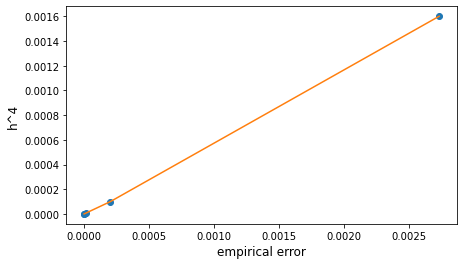

In [8]:
#b 
#Riscrivere i risultati (tranne il primo) con l’errore stimato dalla differenza con la soluzione 
#per l’n precedente e discutere la dipendenza dell’errore dal passo h
def differences(a=a,b=b,n_start = n_start, n_intervals = n_intervals):
    print('\n Error estimated from the difference with previous n solution')
    differences, h_list = np.zeros(n_intervals - 1),np.zeros(n_intervals - 1)
    intervals,integral_values,errors = doubled_intervals(printing = False)
    #print(integral_values)

    for i in range(0,len(integral_values)-1):
        differences[i] = abs(integral_values[i+1] - integral_values[i])
        #print(integral_values[i])
        h_list[i] = (b-a)/intervals[i+1]
        #print(len(h_list), len(differences))
         
        #print(("h %f:, error: %.10f") % (h_list[i],differences[i]))
        
        #print(("intervalli: %d, integral: %0.10f, composite error: %0.10f, empirical error %0.10f")%(intervals[i+1],integral_values[i+1],errors[i+1], differences[i]))
        print(("intervalli: %d, integral: %0.10f, empirical error %0.10f")%(intervals[i+1],integral_values[i+1], differences[i]))


    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(differences[:],h_list**4,'o')
    ax.plot(differences[:],h_list**4)

    ax.set_xlabel('empirical error',fontsize='large')
    ax.set_ylabel('h^4',fontsize='large')
    plt.show()

print("_____RISPOSTA B_____")

differences()
print("\n")   

_____RISPOSTA C_____

** caso x1 = 0.8
n. of intervals: 2, integral: 1.0120699151
n. of intervals: 4, integral: 1.0093375584
n. of intervals: 8, integral: 1.0091349116
n. of intervals: 16, integral: 1.0091216115
n. of intervals: 32, integral: 1.0091207696
n. of intervals: 64, integral: 1.0091207168


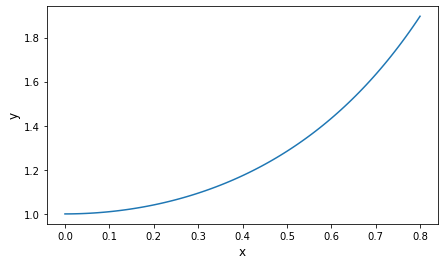



** caso x1 = 2.0
n. of intervals: 2, integral: 22.1570924490
n. of intervals: 4, integral: 17.3536264504
n. of intervals: 8, integral: 16.5385947020
n. of intervals: 16, integral: 16.4588130544
n. of intervals: 32, integral: 16.4530296620
n. of intervals: 64, integral: 16.4526531361


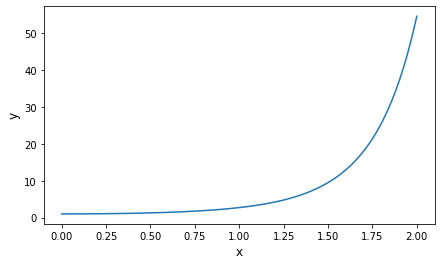

In [9]:
#c
#Esplorare cosa succede per x1= 2, confrontando col caso precedente e discutendo le differenze di come funziona 
#il metodo numerico

print("_____RISPOSTA C_____\n")
lista = [0.8,2]

for i in lista:
    print(("** caso x1 = %.1f")%(i))
    intervals, integral_values,errors = doubled_intervals(b = i)
    
    #graph of the function
    x_list = np.linspace(a,i, 100)
    y_list = function(x_list)
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(x_list, y_list)
    ax.set_xlabel('x',fontsize='large')
    ax.set_ylabel('y',fontsize='large')
    plt.show()

    
    print("\n")

In [10]:
#quick check
from scipy.integrate import quad
I_1 = quad(function, a, 0.8)
I_2 = quad(function, a, 2)

In [11]:
I_1

(1.0091207132779216, 1.1203490505073095e-14)

In [12]:
I_2

(16.45262776550723, 1.5324361329800334e-11)